# V1
This generator had 3 parameters:
1. y-intercept 
2. denom
3. coeff

All waveforms were centered around 0,0 and at right angles.

In [2]:
%reload_ext autoreload
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import numpy as np
import math
from PIL import Image as im
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from src.db import DB

%autoreload 2
db = DB()

0.998,0.869,0.342,0.495,0.614,0.072,0.281,0.717,0.917,0.166,0.272,0.277,0.34,0.099,0.498,0.075,0.746,0.191,0.214,0.193,0.635,0.265,0.27,0.781,0.784,0.648,0.839,0.44,0.3,0.128,0.368,0.362,0.992,0.611,0.002,0.466,0.851,0.86,0.062,0.09
190.534,140.574,215.311,162.507,151.698,217.894,85.992,217.71,142.234,60.595,56.346,118.158,109.18,85.518,96.622,48.775,220.009,151.075,167.726,159.091,176.032,106.438,203.164,89.258,45.501,78.58,210.092,58.348,218.84,29.023,92.143,165.435,171.085,35.093,25.104,66.039,103.91,176.991,47.131,170.73
-5.658,0.036,-32.84,-4.345,24.258,49.672,0.575,-44.368,-0.014,-8.148,15.404,6.153,-13.742,6.061,26.281,-15.13,-9.342,1.009,36.948,27.953,23.566,0.684,0.053,-47.831,49.968,8.316,5.039,11.252,-22.025,25.947,-33.473,39.031,6.555,-24.297,9.108,-29.934,36.749,-18.615,20.941,0.956
scaler.get_params: {'clip': False, 'copy': True, 'feature_range': (0, 1)}


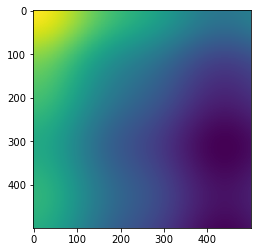

In [6]:
width = 500
height = 500
num_coeffs = 20

def rand_coeff():
    rmax = 1
    m = 0 #- rmax
    c = random.random() * rmax + m
    return round(c,3)

def rand_denomenator():
    rmax = 200
    m = 25
    c = random.random() * rmax + m
    return round(c,3)

def rand_intercept():
    rmax = 100
    c = random.random() * rmax - rmax/2
    return round(c,3)

def get(x,y, coeffs, denom, intercept):
    sum = 0
    for i in range(0,num_coeffs*2,2):
        sum += coeffs[i] * math.cos( x / denom[i] ) + intercept[i]
        sum += coeffs[i+1] * math.cos( y / denom[i+1] ) + intercept[i+1]
    return sum

for _ in range(1):
    coeffs = [ rand_coeff() for i in range(num_coeffs*2)]
    denom = [ rand_denomenator() for i in range(num_coeffs*2)]
    intercepts = [ rand_intercept() for i in range(num_coeffs*2)]
    db.setWorldState('coeffs', ",".join(str(x) for x in coeffs))
    db.setWorldState('denom', ",".join(str(x) for x in denom))
    db.setWorldState('intercepts', ",".join(str(x) for x in intercepts))
    print(",".join(str(x) for x in coeffs))
    print(",".join(str(x) for x in denom))
    print(",".join(str(x) for x in intercepts))

    array = np.zeros((width,height))
    start = 0#random.randint(0,width)
    for x in range(start,width+start):
        for y in range(start,height+start):
            array[y-start][x-start] = get(x+1,y+1, coeffs, denom, intercepts)
    

    if 1:
        array = array.reshape(-1, 1) 
        scaler = MinMaxScaler()
        array = scaler.fit_transform(array)
        array = array * 255
        array = array.astype(int)
        array = array.reshape(width,height)
        print(f"scaler.get_params: {scaler.get_params()}")

    plt.imshow(array, cmap='viridis', interpolation='none')
    plt.show()

In [7]:
db.query('select * from world_state')

[('coeffs',
  '0.998,0.869,0.342,0.495,0.614,0.072,0.281,0.717,0.917,0.166,0.272,0.277,0.34,0.099,0.498,0.075,0.746,0.191,0.214,0.193,0.635,0.265,0.27,0.781,0.784,0.648,0.839,0.44,0.3,0.128,0.368,0.362,0.992,0.611,0.002,0.466,0.851,0.86,0.062,0.09'),
 ('denom',
  '190.534,140.574,215.311,162.507,151.698,217.894,85.992,217.71,142.234,60.595,56.346,118.158,109.18,85.518,96.622,48.775,220.009,151.075,167.726,159.091,176.032,106.438,203.164,89.258,45.501,78.58,210.092,58.348,218.84,29.023,92.143,165.435,171.085,35.093,25.104,66.039,103.91,176.991,47.131,170.73'),
 ('intercepts',
  '-5.658,0.036,-32.84,-4.345,24.258,49.672,0.575,-44.368,-0.014,-8.148,15.404,6.153,-13.742,6.061,26.281,-15.13,-9.342,1.009,36.948,27.953,23.566,0.684,0.053,-47.831,49.968,8.316,5.039,11.252,-22.025,25.947,-33.473,39.031,6.555,-24.297,9.108,-29.934,36.749,-18.615,20.941,0.956')]

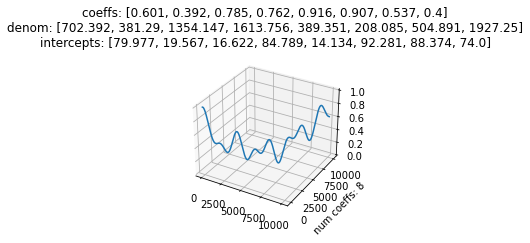

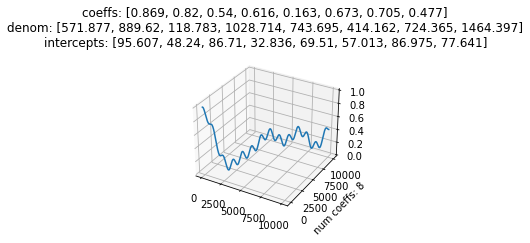

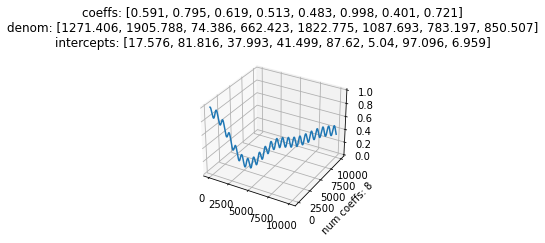

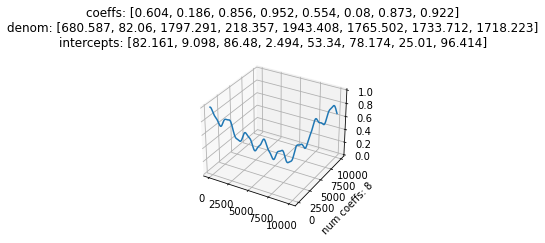

In [5]:
width = 10000
height = 200
num_coeffs = 8


def rand_coeff():
    rmax = 1
    m = 0 #- rmax
    c = random.random() * rmax + m
    return round(c,3)

def rand_denomenator():
    rmax = 2000
    c = random.random() * rmax
    return round(c,3)

def rand_intercept():
    rmax = 100
    c = random.random() * rmax
    return round(c,3)


def get(x,y, coeffs, denom, intercept):
    sum = 0
    for i in range(0,num_coeffs,1):
        sum += coeffs[i] * math.cos( y / denom[i] ) + intercept[i]
    return sum

for _ in range(4):
    coeffs = [ rand_coeff() for i in range(num_coeffs)]
    denom = [ rand_denomenator() for i in range(num_coeffs)]
    intercepts = [ rand_intercept() for i in range(num_coeffs)]


    array = [get(x,x, coeffs, denom, intercepts) for x in range(1,width)]
    array = np.array(array)
    if 1:
        array = array.reshape(-1, 1) 
        scaler = MinMaxScaler()
        array = scaler.fit_transform(array)
        array = np.squeeze(array)
        
    fig, ax = plt.subplots(1,1,figsize=(12,3), subplot_kw={"projection": "3d"}) 
    ax.set_ylabel(f'num coeffs: {num_coeffs}')
    ax.set_title(f"coeffs: {coeffs}\ndenom: {denom}\nintercepts: {intercepts}")
    ax.plot(
            range(1,width),
            range(1,width),
            array
        )

(100, 100)


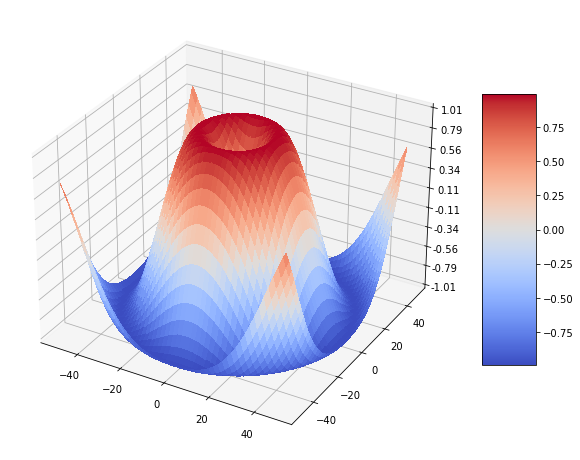

In [309]:
width = 100
height = 100
num_coeffs = 2

fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-width/2, width/2, 1)
Y = np.arange(-height/2, height/2, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)

coeffs = [ rand_coeff() for i in range(num_coeffs)]
denom = [ rand_denomenator() for i in range(num_coeffs)]
intercepts = [ rand_intercept() for i in range(num_coeffs)]

def get(x,y, coeffs, denom, intercept):
    sum = 0
    for i in range(0,num_coeffs,1):
        sum += coeffs[i] * math.cos( y / denom[i] ) + intercept[i]
    return sum


print(R.shape)
Z = np.sin(R/10)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
